From https://www.kaggle.com/c/cifar-10

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.conv_learner import *
PATH = os.path.expanduser('~/data/cifar-10')
sz = 32 # original image size, already low, so I'm unlikely to rescale
val_idxs = get_cv_idxs(50000) # Kaggle description says how many training images
label_csv = os.path.join(PATH, 'trainLabels.csv')

In [2]:
def get_data(f_model):
    global sz, val_idxs, labels_csv
    tfms = tfms_from_model(
        f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(
        PATH,
        os.path.join(PATH, 'train'),
        label_csv,
        tfms=tfms,
        suffix=".png",
        val_idxs=val_idxs,
        test_name=os.path.join(PATH, "test"))

In [3]:
f_model = resnet34
data = get_data(f_model)

In [4]:
x, y = next(iter(data.val_dl))

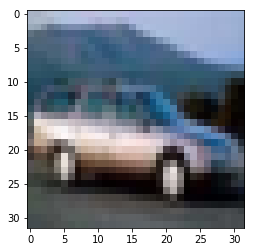

In [5]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]);

In [11]:
learn = ConvLearner.pretrained(f_model, data=get_data(f_model))

In [12]:
learn.lr_find()

 83%|████████▎ | 521/625 [00:40<00:07, 13.02it/s, loss=6.33]

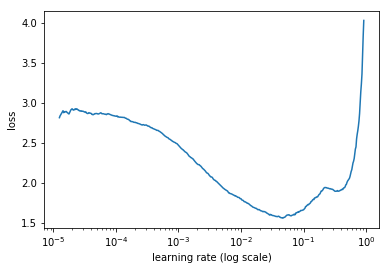

In [13]:
learn.sched.plot()

In [14]:
lr = 0.01

In [15]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

 28%|██▊       | 174/625 [00:09<00:24, 18.12it/s, loss=1.49]
epoch      trn_loss   val_loss   accuracy                   
    0      1.259625   1.057595   0.6335    
    1      1.203271   1.001433   0.6509                     
    2      1.160153   0.984276   0.6562                     
    3      1.199921   0.977544   0.6585                     
    4      1.131392   0.949388   0.67                       
    5      1.106246   0.935012   0.6749                     
    6      1.093537   0.934213   0.6735                     
    7      1.139512   0.940085   0.6686                     
    8      1.10009    0.931522   0.6736                     
    9      1.090625   0.915984   0.6804                     
    10     1.048249   0.908996   0.686                      
    11     1.044144   0.902215   0.6869                     
    12     1.036887   0.898866   0.6879                      
    13     1.021777   0.895158   0.6906                     
    14     1.007693   0.8924     0.6929 

[array([0.8924]), 0.6929]

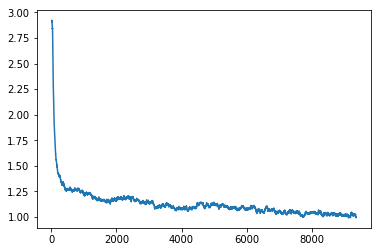

In [16]:
learn.sched.plot_loss()

Train some more

In [18]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.036673   0.891781   0.692     
    1      1.045378   0.891836   0.6932                     
    2      1.01623    0.885605   0.6944                      
    3      1.055465   0.884126   0.6928                     
    4      1.050223   0.875724   0.6938                      
    5      0.996695   0.870946   0.6995                      
    6      1.004875   0.875632   0.6956                      
    7      1.029295   0.885288   0.6873                      
    8      1.030222   0.879316   0.6932                      
    9      0.997274   0.872827   0.6942                      
    10     0.961138   0.861898   0.6984                      
    11     0.968917   0.856076   0.7007                      
    12     0.992924   0.854691   0.7035                      
    13     0.946402   0.855172   0.7044                      
    14     0.954534   0.857479   0.7045                      



[array([0.85748]), 0.7045]

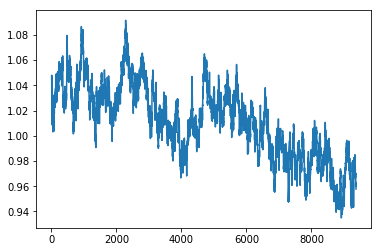

In [19]:
learn.sched.plot_loss()

In [20]:
learn.save("last_layer_only")